# Examen Ben & Frank

### Adolfo Mier y Terán Ruschke

##### Examen diseñado para demostrar la capacidad de análisis de datos, con una tabla mostrando ventas por Tienda, día y concepto, entre otros datos.

###### 1. Importar bibliotecas a utilizar

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

###### 2. Importar base de datos (CSV) con Pandas

In [2]:
df = pd.read_csv('Examen Data Analyst - Sheet1.csv')

###### 3. Mostrar las primeras 5 filas de la tabla, verificando su correcta carga

In [3]:
df.head()

,Name,Financial Status,Fulfillment Status,Taxes,Total,Discount Amount,Created_at (UTC),Lineitem quantity,Lineitem price,Cancelled at,Payment Method,Refunded Amount,Location,Source,Lineitem name
0,MX29-1673,partially_refunded,fulfilled,468.97,3400.0,0.0,2/1/2018 18:24,1,1799.99,NaN,External Credit,150.0,Tienda A,pos,MARTIN
1,MX29-1673,NaN,NaN,NaN,NaN,NaN,2/1/2018 18:24,1,1600.01,NaN,NaN,NaN,NaN,NaN,Micas Oftalmicas
2,MX29-1674,paid,fulfilled,344.83,2500.0,0.0,2/1/2018 20:54,1,1799.99,NaN,External Credit,0.0,Tienda A,pos,ALDOUS
3,MX29-1674,NaN,NaN,NaN,NaN,NaN,2/1/2018 20:54,1,700.00,NaN,NaN,NaN,NaN,NaN,Clipon
4,MX29-1674,NaN,NaN,NaN,NaN,NaN,2/1/2018 20:54,1,0.01,NaN,NaN,NaN,NaN,NaN,Micas Oftalmicas


###### 4. Mostrar el tipo de datos que tenemos en la tabla

In [4]:
df.dtypes

Name                   object
Financial Status       object
Fulfillment Status     object
Taxes                 float64
Total                 float64
Discount Amount       float64
Created_at (UTC)       object
Lineitem quantity       int64
Lineitem price        float64
Cancelled at           object
Payment Method         object
Refunded Amount       float64
Location               object
Source                 object
Lineitem name          object
dtype: object

###### 5. Describir estadisticamente las variables cuantitativas de la tabla

In [5]:
df.describe()

,Taxes,Total,Discount Amount,Lineitem quantity,Lineitem price,Refunded Amount
count,8805.000000,8805.000000,8805.000000,18783.000000,18783.000000,8805.000000
mean,265.740282,1937.009853,77.270315,1.022893,940.591355,32.546848
std,118.091676,859.834905,368.731781,0.168008,872.789180,194.615647
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,248.280000,1800.000000,0.000000,1.000000,0.010000,0.000000
50%,248.280000,1800.000000,0.000000,1.000000,1100.010000,0.000000
75%,248.280000,1800.000000,0.000000,1.000000,1799.990000,0.000000
max,2006.900000,14550.000000,6450.020000,7.000000,3400.000000,4850.000000


###### 6. Ajustar columna Datetime (objeto)
###### 7. Cambiar zona horaria a MXN
###### 8. Ajustar horas
###### 9. Ajustar minutos
###### 10. Mostrar columna con nuevo formato

In [6]:
df['Created_at (UTC)'] = pd.to_datetime(df['Created_at (UTC)']) #Cambiar de tipo de objeto a Datetime columna Created_at (UTC)
df['Created_at (MXN)'] = df['Created_at (UTC)'].dt.tz_localize('UTC') #Cambiar a la zona horaria de Mexico con nueva columna
df['Created_at (MXN)'] = df['Created_at (MXN)'].dt.tz_convert('America/Mexico_City')  #Arreglar las horas
df['Created_at (MXN)'] = df['Created_at (MXN)'].dt.tz_localize(None) #Ajustar minutos y horas

df['Created_at (MXN)'] #Revisar columnas

0       2018-02-01 12:24:00
1       2018-02-01 12:24:00
2       2018-02-01 14:54:00
3       2018-02-01 14:54:00
4       2018-02-01 14:54:00
                ...        
18778   2018-01-03 18:09:00
18779   2018-01-03 18:50:00
18780   2018-01-03 18:50:00
18781   2018-01-03 19:11:00
18782   2018-01-03 19:11:00
Name: Created_at (MXN), Length: 18783, dtype: datetime64[ns]

###### 11. Verificar en nueva tabla creación de columna

In [7]:
df.head() #Verificar creacion de nueva columna

,Name,Financial Status,Fulfillment Status,Taxes,Total,Discount Amount,Created_at (UTC),Lineitem quantity,Lineitem price,Cancelled at,Payment Method,Refunded Amount,Location,Source,Lineitem name,Created_at (MXN)
0,MX29-1673,partially_refunded,fulfilled,468.97,3400.0,0.0,2018-02-01 18:24:00,1,1799.99,NaN,External Credit,150.0,Tienda A,pos,MARTIN,2018-02-01 12:24:00
1,MX29-1673,NaN,NaN,NaN,NaN,NaN,2018-02-01 18:24:00,1,1600.01,NaN,NaN,NaN,NaN,NaN,Micas Oftalmicas,2018-02-01 12:24:00
2,MX29-1674,paid,fulfilled,344.83,2500.0,0.0,2018-02-01 20:54:00,1,1799.99,NaN,External Credit,0.0,Tienda A,pos,ALDOUS,2018-02-01 14:54:00
3,MX29-1674,NaN,NaN,NaN,NaN,NaN,2018-02-01 20:54:00,1,700.00,NaN,NaN,NaN,NaN,NaN,Clipon,2018-02-01 14:54:00
4,MX29-1674,NaN,NaN,NaN,NaN,NaN,2018-02-01 20:54:00,1,0.01,NaN,NaN,NaN,NaN,NaN,Micas Oftalmicas,2018-02-01 14:54:00


###### 12. Filtrar de la base las Tiendas que tengan valor (limpieza de la base)

In [8]:
df1 = df[df.Location.notnull()].reset_index(drop=True) #Filtrar de la base, las tiendas que tengan valor
df1

,Name,Financial Status,Fulfillment Status,Taxes,Total,Discount Amount,Created_at (UTC),Lineitem quantity,Lineitem price,Cancelled at,Payment Method,Refunded Amount,Location,Source,Lineitem name,Created_at (MXN)
0,MX29-1673,partially_refunded,fulfilled,468.97,3400.0,0.0,2018-02-01 18:24:00,1,1799.99,NaN,External Credit,150.0,Tienda A,pos,MARTIN,2018-02-01 12:24:00
1,MX29-1674,paid,fulfilled,344.83,2500.0,0.0,2018-02-01 20:54:00,1,1799.99,NaN,External Credit,0.0,Tienda A,pos,ALDOUS,2018-02-01 14:54:00
2,MX29-1675,paid,fulfilled,248.28,1800.0,0.0,2018-02-01 21:15:00,1,1799.99,NaN,External Credit,0.0,Tienda A,pos,DARIA JR,2018-02-01 15:15:00
3,MX29-1676,paid,fulfilled,248.28,1800.0,0.0,2018-02-01 22:45:00,1,1799.99,NaN,External Credit,0.0,Tienda A,pos,JANIS,2018-02-01 16:45:00
4,MX29-1677,paid,fulfilled,227.58,1650.0,150.0,2018-02-01 23:16:00,1,1799.99,NaN,External Credit,0.0,Tienda A,pos,ESQUIVEL,2018-02-01 17:16:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8799,MX42-1338,paid,fulfilled,317.24,2300.0,0.0,2018-03-31 21:28:00,1,1799.99,NaN,Cash,0.0,Tienda A,pos,ALDOUS,2018-03-31 15:28:00
8800,MX42-1339,partially_refunded,fulfilled,248.28,1800.0,0.0,2018-01-04 00:06:00,1,0.01,NaN,External Credit,300.0,Tienda A,pos,Micas,2018-01-03 18:06:00
8801,MX42-1340,paid,fulfilled,248.28,1800.0,0.0,2018-01-04 00:09:00,1,1799.99,NaN,External Credit,0.0,Tienda A,pos,TRUMAN,2018-01-03 18:09:00
8802,MX42-1341,partially_refunded,fulfilled,248.28,1800.0,0.0,2018-01-04 00:50:00,1,1799.99,NaN,External Credit,150.0,Tienda A,pos,RAMIREZ,2018-01-03 18:50:00


###### 13. Seleccionar solamente Q1 de datos. El resto del año no tiene datos reales, solamente estimados.

In [9]:
df2 = df1[(df1['Created_at (MXN)']>='2018-01-01')&(df1['Created_at (MXN)']<'2018-04-01')] #Seleccionar solamente el primer trimestre
df2

,Name,Financial Status,Fulfillment Status,Taxes,Total,Discount Amount,Created_at (UTC),Lineitem quantity,Lineitem price,Cancelled at,Payment Method,Refunded Amount,Location,Source,Lineitem name,Created_at (MXN)
0,MX29-1673,partially_refunded,fulfilled,468.97,3400.0,0.0,2018-02-01 18:24:00,1,1799.99,NaN,External Credit,150.0,Tienda A,pos,MARTIN,2018-02-01 12:24:00
1,MX29-1674,paid,fulfilled,344.83,2500.0,0.0,2018-02-01 20:54:00,1,1799.99,NaN,External Credit,0.0,Tienda A,pos,ALDOUS,2018-02-01 14:54:00
2,MX29-1675,paid,fulfilled,248.28,1800.0,0.0,2018-02-01 21:15:00,1,1799.99,NaN,External Credit,0.0,Tienda A,pos,DARIA JR,2018-02-01 15:15:00
3,MX29-1676,paid,fulfilled,248.28,1800.0,0.0,2018-02-01 22:45:00,1,1799.99,NaN,External Credit,0.0,Tienda A,pos,JANIS,2018-02-01 16:45:00
4,MX29-1677,paid,fulfilled,227.58,1650.0,150.0,2018-02-01 23:16:00,1,1799.99,NaN,External Credit,0.0,Tienda A,pos,ESQUIVEL,2018-02-01 17:16:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8799,MX42-1338,paid,fulfilled,317.24,2300.0,0.0,2018-03-31 21:28:00,1,1799.99,NaN,Cash,0.0,Tienda A,pos,ALDOUS,2018-03-31 15:28:00
8800,MX42-1339,partially_refunded,fulfilled,248.28,1800.0,0.0,2018-01-04 00:06:00,1,0.01,NaN,External Credit,300.0,Tienda A,pos,Micas,2018-01-03 18:06:00
8801,MX42-1340,paid,fulfilled,248.28,1800.0,0.0,2018-01-04 00:09:00,1,1799.99,NaN,External Credit,0.0,Tienda A,pos,TRUMAN,2018-01-03 18:09:00
8802,MX42-1341,partially_refunded,fulfilled,248.28,1800.0,0.0,2018-01-04 00:50:00,1,1799.99,NaN,External Credit,150.0,Tienda A,pos,RAMIREZ,2018-01-03 18:50:00


###### 14. Agrupar df por mes, y crear plot con los totales por mes de ventas.

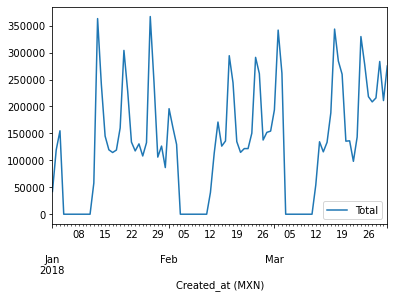

In [10]:
df3 = df2.groupby(pd.Grouper(key='Created_at (MXN)', freq = 'D'))[['Total']].sum().reset_index() #Agrupas DF por por mes
df3.plot(x='Created_at (MXN)', y='Total')

###### 15. Asignar dos columnas con día de la semana, y hora del día.

In [11]:
df2['Day of week'] = df2['Created_at (MXN)'].dt.weekday
df2['Hour of day'] = df2['Created_at (MXN)'].dt.hour
df2.head()

<ipython-input-11-53900152bf7c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Day of week'] = df2['Created_at (MXN)'].dt.weekday
<ipython-input-11-53900152bf7c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Hour of day'] = df2['Created_at (MXN)'].dt.hour


,Name,Financial Status,Fulfillment Status,Taxes,Total,Discount Amount,Created_at (UTC),Lineitem quantity,Lineitem price,Cancelled at,Payment Method,Refunded Amount,Location,Source,Lineitem name,Created_at (MXN),Day of week,Hour of day
0,MX29-1673,partially_refunded,fulfilled,468.97,3400.0,0.0,2018-02-01 18:24:00,1,1799.99,NaN,External Credit,150.0,Tienda A,pos,MARTIN,2018-02-01 12:24:00,3,12
1,MX29-1674,paid,fulfilled,344.83,2500.0,0.0,2018-02-01 20:54:00,1,1799.99,NaN,External Credit,0.0,Tienda A,pos,ALDOUS,2018-02-01 14:54:00,3,14
2,MX29-1675,paid,fulfilled,248.28,1800.0,0.0,2018-02-01 21:15:00,1,1799.99,NaN,External Credit,0.0,Tienda A,pos,DARIA JR,2018-02-01 15:15:00,3,15
3,MX29-1676,paid,fulfilled,248.28,1800.0,0.0,2018-02-01 22:45:00,1,1799.99,NaN,External Credit,0.0,Tienda A,pos,JANIS,2018-02-01 16:45:00,3,16
4,MX29-1677,paid,fulfilled,227.58,1650.0,150.0,2018-02-01 23:16:00,1,1799.99,NaN,External Credit,0.0,Tienda A,pos,ESQUIVEL,2018-02-01 17:16:00,3,17


###### 16. Realizar funcion crosstab para crear relación de Tiendas/Día de la Semana/Ventas

In [12]:
d = pd.crosstab(index = df2['Location'],columns = df2['Day of week']).reset_index()
d

Day of week,Location,0,1,2,3,4,5,6
0,Tienda A,358,386,442,423,563,948,584
1,Tienda B,259,263,253,236,285,459,292
2,Tienda C,36,50,49,37,49,110,33


###### 17. Realizar gráfica con resultados de venta por Tienda, por día de la semana.

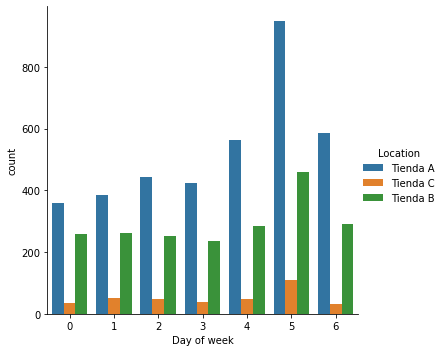

In [13]:
sns.catplot(x='Day of week', hue='Location', data = df2, kind = 'count')

###### 18. Realizar gráfica con resultados de venta por hora del día por Tienda.

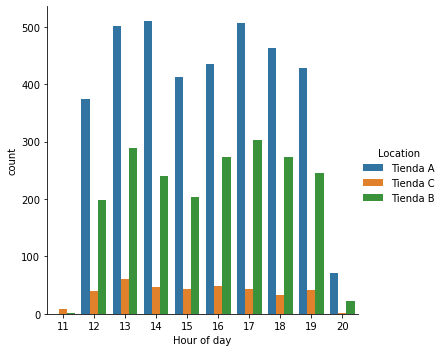

In [14]:
sns.catplot(x='Hour of day', hue='Location', data = df2, kind = 'count')